# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/mammogram.csv")
df.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


In [64]:
# 1. Cross tabulate treatment and breast_cancer_death.
# What is the difference in 25-year survival rates between the control and mammogram groups?

print( pd.crosstab( df['treatment'], df['breast_cancer_death']) , '\n')

treatment_effect = (44425/(44425+500)) - (44405/(44405+505))

print("Difference in Control/Mammogram group Survival Rates:", (44425/(44425+500)) - (44405/(44405+505)))

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

Difference in Control/Mammogram group Survival Rates: 0.00011505110015985753


In [65]:
# 2.  Bootstrap the densities and distributions of survival rates for the two groups.

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

effects = []
S = 1000
for s in range(S):
  df_treat_s = df_treat.sample(df_treat.shape[0], axis=0, replace=True)
  df_control_s = df_control.sample(df_control.shape[0], axis=0, replace=True)
  treatment_effect_s = np.mean(df_treat_s['survive']) - np.mean(df_control_s['survive'])
  effects.append(treatment_effect_s)

sns.kdeplot(effects)
plt.show()

sns.ecdfplot(effects)
plt.show()

KeyError: 'survive'

99% Confidence Interval [-0.00155499  0.00207411]


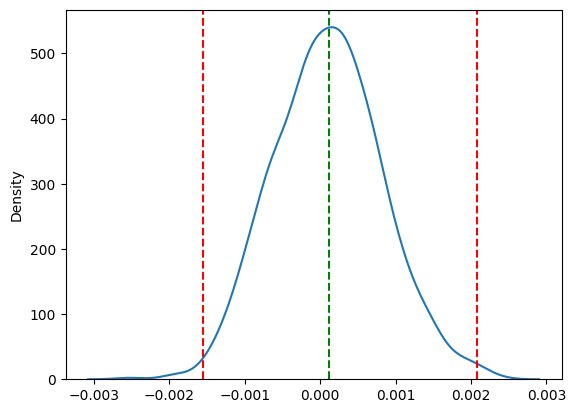

In [21]:
# 3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?

CI = np.quantile(effects,[.005,.995])

print("99% Confidence Interval", CI)

ax = sns.kdeplot(effects)
ax.axvline(x = treatment_effect,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

# Zero is within the confidence interval! This means that mammograms do not provide a statistically significant
# difference in 25-year survival rates compared to the control group.

In [ ]:
# 4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse.
# Why might these data over/understate the conclusions you've reached?
# What other data would you like to have to better understand or criticize your results?

To better understand these results, it could be helpful to have more information about the patients who received the treatments and how the treatment type was decided. The data could be biased if the treatment type was not randomly assigned (although randomly assigning this type of treatment might not be ethical). Nonetheless, if patients chose to receive a mammogram, then they may possess certain characteristics that may have made it seem like mammograms are not effective. For example, wealthier people tend to be healthier overall due to their increased access to healthcare. If these wealthier, healthier people tended to choose to get mammograms, it could make mammograms seem ineffective compared to the control group who may have more serious problems. Ultimately, due to the lack of sufficient data on the patients and the methods of the study, we cannot make any causal claims about the effectiveness of mammograms in preventing breast cancer deaths.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

In [38]:
# 1. Cross tabulate treatment and outcome.

df2 = pd.read_csv("/content/diabetes_hw.csv")
df2.head()

print(pd.crosstab( df2['treatment'], df2['outcome']) , '\n')

outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143 



In [39]:
# 2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?

lifestyle_success = (125/(109+125))
met_success = (112/(120+112))
rosi_success = (143/(90+143))

print("Lifestyle success:", lifestyle_success)
print("Met success:", met_success)
print("Rosi success:", rosi_success) # seems to be the most effective

Lifestyle success: 0.5341880341880342
Met success: 0.4827586206896552
Rosi success: 0.6137339055793991


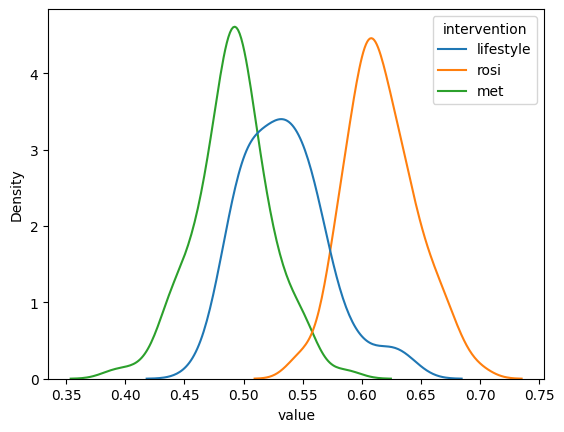

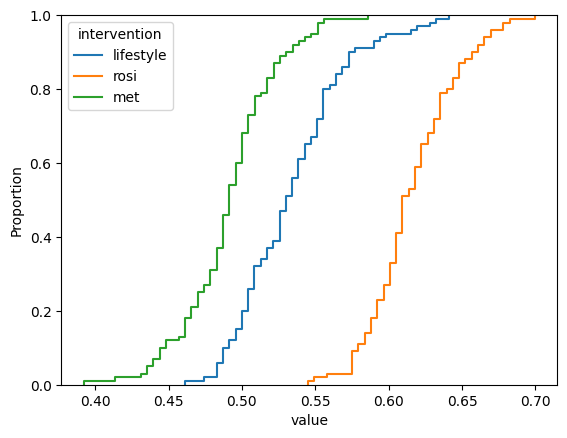

In [55]:
# 3. Bootstrap the density and distribution of the proportion of successes for each interventions.
# Create empirical CDF and kernel density plots that are grouped by treatment type.
# Which treatment appears to be the most effective?

S = 100

df_life = df2.loc[ df2['treatment'] == 'lifestyle', :]
df_met = df2.loc[ df2['treatment'] == 'met', :]
df_rosi = df2.loc[ df2['treatment'] == 'rosi', :]

life_effect = []
met_effect = []
rosi_effect = []

for s in range(S):
  df_life_s = df_life.sample(df_life.shape[0], axis=0, replace=True)
  df_met_s = df_met.sample(df_met.shape[0], axis=0, replace=True)
  df_rosi_s = df_rosi.sample(df_rosi.shape[0], axis=0, replace=True)

  life_effect_s = np.mean(df_life_s['outcome'] == 'success')
  met_effect_s = np.mean(df_met_s['outcome'] == 'success')
  rosi_effect_s = np.mean(df_rosi_s['outcome'] == 'success')

  life_effect.append(life_effect_s)
  met_effect.append(met_effect_s)
  rosi_effect.append(rosi_effect_s)


gdf_lif = pd.DataFrame({'value':life_effect, 'intervention':'lifestyle'})
gdf_met = pd.DataFrame({'value':met_effect, 'intervention':'met'})
gdf_ros = pd.DataFrame({'value':rosi_effect, 'intervention':'rosi'})
gdf = pd.concat([gdf_lif, gdf_ros, gdf_met], axis=0)

sns.kdeplot(data=gdf, x='value', hue = 'intervention')
plt.show()

sns.ecdfplot(data=gdf, x='value', hue = 'intervention')
plt.show()

90% Confidence interval for rosi vs. lifestyle:  [0.01514068 0.16135413]


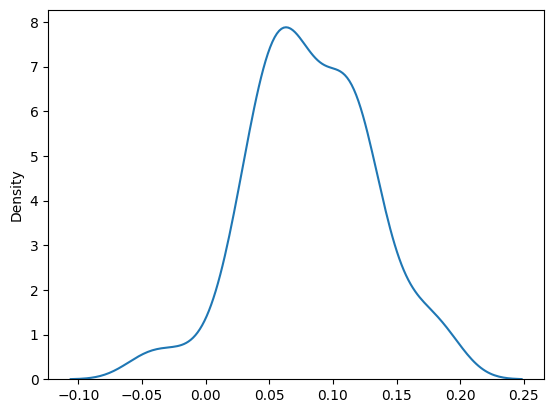

90% Confidence interval for met vs. rosi:  [0.05722584 0.19096123]


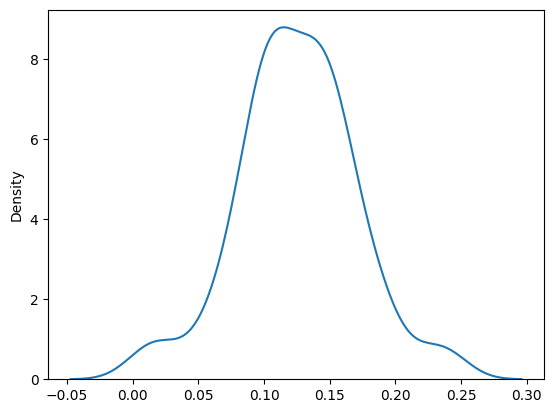

90% Confidence interval for lifestyle vs. met:  [-0.03083554  0.12004863]


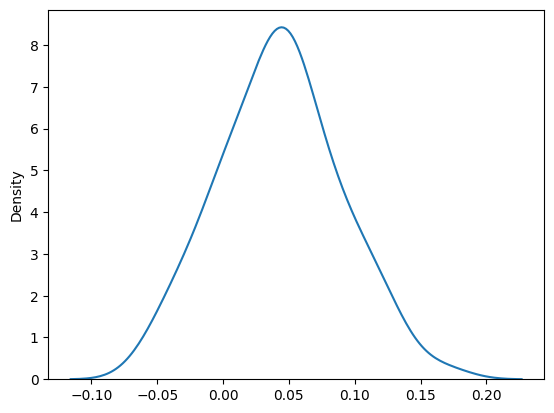

In [61]:
# 4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of
# the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantly
# different?

rosi_lifestyle_diff = np.array(rosi_effect)-np.array(life_effect)
sns.kdeplot(x=rosi_lifestyle_diff)
rl_CI = np.quantile(rosi_lifestyle_diff,[.05,.95])
print('90% Confidence interval for rosi vs. lifestyle: ', rl_CI)
plt.show()

met_rosi_diff = np.array(rosi_effect)-np.array(met_effect)
sns.kdeplot(x=met_rosi_diff)
mr_CI = np.quantile(met_rosi_diff,[.05,.95])
print('90% Confidence interval for met vs. rosi: ', mr_CI)
plt.show()

lifestyle_met_diff = np.array(life_effect)-np.array(met_effect)
sns.kdeplot(x=lifestyle_met_diff)
lm_CI = np.quantile(lifestyle_met_diff,[.05,.95])
print('90% Confidence interval for lifestyle vs. met: ', lm_CI)
plt.show()


In [ ]:
# 5. Which treatment appears to be the most effective overall?

Based on the data, Rosi seems to be the most effective treatment compared to lifestyle and met since 0 is not within the confidence intervals. In the comparison of lifestyle and met, 0 is within the confidence interval which suggests that there is no significant difference in how effective these two treatments are. However, similar to Q2, I believe that more research/information should be provided regarding these treatment options. When it comes to recommending medicine for treating a condition, it is important to consider side-effects/possible consequences/etc. as well as weigh the benefits of alternative treatments. For example, treating diabetes with a medication may be very effective for some but lead to dehabilitating side-effects for others, in which case it would have been beneficial to consider a lifestyle-based treatment first.

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?